## Logistik regressiya
Avvaliga kerakli bibliotekalarni yuklab olaylik:
- numpy - pitonda massivlar bilan ishlash uchun
- pandas - pitonda ma'lumotlarni qayta ishlash uchun, biz esa CSV hamda jadval ko'rinishidagi ma'lumotlar bilan ishlash uchun yuklaymiz
- matplotlib - pitonda chizish amallarini bajarish uchun, biz grafiklarni chizishda foydalanamiz
- math - pitonda matematik amallar bilan ishlash uchun

Database source:
https://www.kaggle.com/uciml/pima-indians-diabetes-database
https://machinelearningmastery.com/implement-logistic-regression-stochastic-gradient-descent-scratch-python/

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

Logistik regressiya uchun ushbu https://www.kaggle.com/uciml/pima-indians-diabetes-database vebsaytda keltirilgan ma'lumotlar to'plamidan foydalanamiz. Ushbu ma'lumotlar to'plamini yuklab olamiz hamda, ushbu ".ipynb" fayl joylashgan katalogga joylaymiz va arxivdan chiqaramiz. So'ngra, *pandas* bibliotekasi yordamida yuklaymiz:

In [130]:
df = pd.read_csv('diabetes.csv')

Ma'lumotlar ba'zasi bilan tanishib chiqaylik, ya'ni qanday ustunlar bor, va ulardagi ma'lumotlar qanday ko'rinishda, va h.k.

In [131]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Ushbu ma'lumotlar to'plami AQSHning Diabet va oshqozon-ichak va buyrak kasalliklari milliy instituti (National Institute of Diabetes and Digestive and Kidney Diseases) ma'lumotlariga asoslangan bo'lib, Amerika tub aholisining 21 yoshdan katta bo'lgan ayollardagi turli analizlar, xususan diabet kasalligi bor yoki yo'qligini o'zida ifodalaydi. Ma'lumotlar to'plamida 9 ta ustun mavjud bo'lib, ularni quyidagicha tavsif etish mumkin:

- Pregnancies - ayol necha marta homilador bo'lgan
- Glucose - glyukoza o'lchovi
- BloodPressure - qon bosimi
- SkinThickness - teri qalinligi
- Insulin - insulin o'lchovi
- BMI - bo'y va vazn o'lchovi ($kg / m^2$)
- Diabetes Pedigree Function - diabet kasallgining nasldagi koefisienti
- Age - yosh
- Outcome - diabet kasallgi mavjud (1) yoki yo'q (1)

Endi ma'lumotlar to'plamining texnik jihatlari bilan tanishsak, ya'ni qanday formatda, qatorlar soni va h.k.

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Ko'rib turganimizdek, ma'lumotlar to'plami 768 ta qatordan iborat hamda har bir ustun turli xil formatlarda (*int64* va *float64*). Ushbu ma'lumotlar to'plamini matematik amallarga, xususan logistik regressiya jarayoniga moslaylik. Bunda, avvalo hisob-kitoblarda qulay bo'lishi uchun *numpy* massiviga o'giramiz, bunda ustunlarni formati sifatida *float64* tanlaymiz.

In [133]:
df = np.array(df, dtype = float)

In [134]:
df.shape

(768, 9)

Ma'lumotlar to'plamidan o'rganish jarayoni uchun ustunlarni ajratib olamiz, va *X* o'zgaruvchisiga massiv sifatida yuklaymiz. E'tibor bering, oxirgi ustun **Outcome** ustuni mashq to'plamiga yuklanmayapti, sababi bu ustunni alohida o'zgaruvchiga nishonlar massivi sifatida yuklaymiz.

In [135]:
X = df[:, :8]

In [136]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [137]:
X.shape

(768, 8)

In [138]:
X[:10]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01],
       [5.000e+00, 1.160e+02, 7.400e+01, 0.000e+00, 0.000e+00, 2.560e+01,
        2.010e-01, 3.000e+01],
       [3.000e+00, 7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01,
        2.480e-01, 2.600e+01],
       [1.000e+01, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01,
        1.340e-01, 2.900e+01],
       [2.000e+00, 1.970e+02, 7.000e+01, 4.500e+01, 5.430e+02, 3.050e+01,
        1.580e-01, 5.300e+01],
       [8.000e+00, 1.250e+02, 9.600e+01, 0.000e+00, 0.0

Ma'lumotlar to'plamidan nishonlarni ajratib olamiz, va *Y* o'zgaruvchisiga yuklaymiz.

In [139]:
Y = df[:,8:]

In [140]:
Y.shape

(768, 1)

In [141]:
Y[:10]

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.]])

## Kirish o'zgaruvchilari sayqallanishi - standartlashtirish

Kirish o'zgaruvchilarini sayqallashtirishda standartlashtirish usuilidan foydalanaylik, bunda quyidagi formuladan foydalanamiz:

$ x_j^{(i)} := \frac{x_j^{(i)} - \mu_j }{S_j} $

Yuqoridagi formuladagi o'rta arifmetik qiymat ($\mu_j$) hamda o'rta kvadratik og'ishni ($S_j$) topishda *numpy* bibliotekasidagi *mean()* va *std()* funksiyalardan foydalanamiz va ushbu formulani ifoda etuvchi *feature_scaling* funksiyasini yarataylik.

In [142]:
def feature_scaling(X):
    avg_array = np.mean(X, 0)
    std_array = np.std(X, 0)
    return np.divide(X - avg_array, std_array)

*feature_scaling* funksiyasi yordamida kiruvchi o'zgaruvchilarni sayqallashtiraylik.

In [143]:
X = feature_scaling(X)

In [144]:
X[:10]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ],
       [ 0.3429808 , -0.15318486,  0.25303625, -1.28821221, -0.69289057,
        -0.81134119, -0.81807858, -0.27575966],
       [-0.25095213, -1.34247638, -0.98770975,  0.71908574,  0.07120427,
        -0.12597727, -0.676133  , -0.61611067],
       [ 1.82781311, -0.184482  , -3.57259724, -1.28821221, -0.69289057,
         0.41977549, -1.02042653, -0.36084741],
       [-0.54791859,  2.38188392

Vertikal hisoblarda qulay bo'lish uchun, qiymati $1$dan iborat bo'lgan $X_0$ vektorni $X$ massiviga qo'shaylik.

In [145]:
def add_bias(X):
    B = np.ones((X.shape[0], 1))
    return np.hstack((B, X))

In [146]:
X = add_bias(X)

In [147]:
X[:10]

array([[ 1.        ,  0.63994726,  0.84832379,  0.14964075,  0.90726993,
        -0.69289057,  0.20401277,  0.46849198,  1.4259954 ],
       [ 1.        , -0.84488505, -1.12339636, -0.16054575,  0.53090156,
        -0.69289057, -0.68442195, -0.36506078, -0.19067191],
       [ 1.        ,  1.23388019,  1.94372388, -0.26394125, -1.28821221,
        -0.69289057, -1.10325546,  0.60439732, -0.10558415],
       [ 1.        , -0.84488505, -0.99820778, -0.16054575,  0.15453319,
         0.12330164, -0.49404308, -0.92076261, -1.04154944],
       [ 1.        , -1.14185152,  0.5040552 , -1.50468724,  0.90726993,
         0.76583594,  1.4097456 ,  5.4849091 , -0.0204964 ],
       [ 1.        ,  0.3429808 , -0.15318486,  0.25303625, -1.28821221,
        -0.69289057, -0.81134119, -0.81807858, -0.27575966],
       [ 1.        , -0.25095213, -1.34247638, -0.98770975,  0.71908574,
         0.07120427, -0.12597727, -0.676133  , -0.61611067],
       [ 1.        ,  1.82781311, -0.184482  , -3.57259724, -1

In [148]:
X.shape

(768, 9)

## Ma'lumotlarni mashq/test to'plamlariga bo'lish
Bizda mavjud bo'lgan ma'lumotlar to'plamini mash/test to'plamlariga bo'laylik. Bunda biz yaratadigan chiziqli regressiya mashq datasetdan o'rganadi va test datasetdan uning effektivligini tekshiramiz. Mashq/test datasetga bo'lishda 80/20 nisbatdan foydalanamiz, ya'ni ma'lumotlar to'plamining 80% mashq va 20% esa test datasetga bo'lamiz.

In [149]:
rows, _ = X.shape

In [150]:
def split(X, Y):
    rows, _ = X.shape
    train_rows = round(rows * 0.8)
    test_rows = rows - train_rows
    return X[0:train_rows,:], X[train_rows:, :], Y[0:train_rows,:], Y[train_rows:, :]    

In [151]:
X_train, X_test, Y_train, Y_test = split(X, Y)

In [152]:
X_train.shape

(614, 9)

In [153]:
X_test.shape

(154, 9)

In [154]:
Y_train.shape

(614, 1)

In [155]:
Y_test.shape

(154, 1)

## Koefisientlarni inisializatsiya qilish

Logistik regressiyaning formulasini eslaylik:
<br><br>
$     f(Z) = \frac{1}{1 + e^{-Z}} $
<br><br>
Bunda Z:
<br><br>
$     Z = a_0 \times x_0 + a_1 \times x_1 + a_2 \times x_2 + \cdots + a_n \times x_n $
<br><br>
Demak, bizda $n=8$. Chunki bizda 8 ta ustun mavjud. Lekin biz 9 ta parametrni inisializatsiya qilamiz ($a_0$ ni ham hisobga olganda).<br>
*Eslatib o'tamiz, $Z$ funksiyani vektorlangan ko'rinishi: <br><br>
$     Z = X * A^T $

In [156]:
A = np.random.rand(X.shape[1], 1)

In [157]:
A.shape

(9, 1)

In [158]:
A

array([[0.41305024],
       [0.92586999],
       [0.45706307],
       [0.79343465],
       [0.17371562],
       [0.1779987 ],
       [0.68113032],
       [0.29840065],
       [0.59808634]])

## Logistik regressiya funksiyasi
Bizda koefisientlar uchun o'zgaruvchilarni aniqlab oldik, endi funksiyani aniqlasak bo'ladi. Ushbu funksiyani *logistic_regression_function()* deb ataylik va quyidagi formulani ifodalaydi:

$     f(Z) = \frac{1}{1 + e^{-Z}} $
<br><br>
Bunda Z:
<br><br>
$     Z = a_0 \times x_0 + a_1 \times x_1 + a_2 \times x_2 + \cdots + a_n \times x_n $

In [159]:
def logistic_regression_function(X, A):
    Z = np.dot(X,A)
    return 1 / (1 + np.exp(-Z))

## Qiymat funskiyasi va Gradient tushish
Chiziqli regressiyaning qiymat funksiyasini eslaylik:
<br><br>
$      J = -\frac{1}{m} \sum_{i=1}^{m} \big[y^{(i)} \log(f(x^{(i)})) + (1 - y^{(i)}) \log(1 - f(x^{(i)}))] $

<br>
Ushbu qiymat funksiyasini dasturda ifodalaylik:

In [160]:
def cost(X, A, Y):
    m = Y.shape[0]
    F_x = logistic_regression_function(X, A)
    cost_ = - np.sum(Y * np.log(F_x) + (1-Y) * np.log(1 - F_x)) / m
    return cost_

Gradient tushishda esa, biz yuqoridagi qiymat funksiyasini minimallashtiruvchi parametrlarni topamiz. Bunda biz har bir parameter uchun ma'lum bir qator davomida quyidagi ifodani takrorlashimiz kerak:

takrorla, $ k=1 \cdots epochs $ $ \{ $ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ a_j := a_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (f(x^{(i)}) - y^{(i)}) \times x^{(i)}_j $ <br>
&nbsp;&nbsp;&nbsp;&nbsp; $ \} $<br>

Yuqoridagi siklni amalga oshirishda bir qator giperparametrlarni aniqlab olaylik:
- Qadamlar soninig qiymatini $500$ deb belgilaymiz va *epochs* o'zgaruvchisida saqlaymiz
- O'rganish darajasini $0.1$ deb belgilaylik va *learning_rate* o'zgaruvchisida saqlaymiz

Har bir qadamda mashq va test to'plami uchun qiymatni hisoblaymiz va, mos ravishda *train_costs* va *test_costs* massivlarida saqlaymiz.

In [161]:
epochs = 500
learning_rate = 0.1

Gradient tushishni amalga oshiruvchi funksiyani yaratamiz va $gradient\_descent$ deb nomlaymiz

In [162]:
def gradient_descent(X_train, Y_train, X_test, Y_test, A, learning_rate, epochs):
    train_costs = []
    test_costs = []
    m_train = Y_train.shape[0]
    m_test = Y_test.shape[0]
    for k in range(epochs):
        F_x = logistic_regression_function(X_train, A)
        A = A - learning_rate * np.dot(X_train.T, (F_x - Y_train)) / m_train
        cost_train_ = cost(X_train, A, Y_train)
        cost_test_ = cost(X_test, A, Y_test)
        train_costs.append(cost_train_)
        test_costs.append(cost_test_)
        if k % 20 == 0:
            print('epoch: %d, %f'% (k, cost_train_))
    return A, train_costs, test_costs

Gradient tushishni amalaga oshiraylik, bunda biz yaratgan *gradient_descent* funksiyasidan foydalanamiz va ushbu funksiya gradient tushishni amalga oshirib, topilgan optimal qiymatni *A* o'zgaruvchisi va har bir qadamdagi *mashq* va *test* to'plamlar uchun qiymat funksiyani ifoda etuvchi *train_costs*, *test_costs* massivlarini qaytaradi.

In [163]:
A, train_costs, test_costs = gradient_descent(X_train, Y_train, X_test, Y_test, A, learning_rate, epochs)

epoch: 0, 0.761052
epoch: 20, 0.622478
epoch: 40, 0.544009
epoch: 60, 0.505538
epoch: 80, 0.487861
epoch: 100, 0.479525
epoch: 120, 0.475272
epoch: 140, 0.472899
epoch: 160, 0.471471
epoch: 180, 0.470563
epoch: 200, 0.469962
epoch: 220, 0.469553
epoch: 240, 0.469269
epoch: 260, 0.469068
epoch: 280, 0.468926
epoch: 300, 0.468823
epoch: 320, 0.468749
epoch: 340, 0.468694
epoch: 360, 0.468655
epoch: 380, 0.468625
epoch: 400, 0.468604
epoch: 420, 0.468588
epoch: 440, 0.468576
epoch: 460, 0.468568
epoch: 480, 0.468561


Gradient tushishda qiymat funksiyasining qay darajada o'zgarganini vizual ko'rish uchun, grafik *plot_cost* funksiyasini yarataylik, ushbu funksiya *matplotlib* bibliotekasidan foydalanib graf chizadi.

In [164]:
def plot_cost(train_costs,test_costs, epochs):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(epochs, train_costs, 'm', linewidth = "1", color='r', label='mashqdagi xatolik')
    plt.plot(epochs, test_costs, 'm', linewidth = "1", color='g', label='testdagi xatolik')
    plt.legend(loc="upper right")
    plt.show()

*plot_cost* funksiyasi parametr sifatida 3 ta massiv o'zgaruvchisini qabul qiladi va bular:
-  mashq to'plami uchun qiymat funksiyasining natijasi ifodalangan massiv, *train_costs* o'zgaruvchisi
-  test to'plami uchun qiymat funksiyasining natijasi ifodalangan massiv, *test_costs* o'zgaruvchisi
- qadamlarni ifoda etuvchi massiv, *epochs* o'zgaruvchisi

In [165]:
n_epochs = np.arange(1, epochs + 1)
n_train_costs = np.array(train_costs)
n_test_costs = np.array(test_costs)

Qiymat funksiyasini har qadamda o'zgarishini *plot_cost* funksiyasi orqali grafik tarzda ifodalaylik.

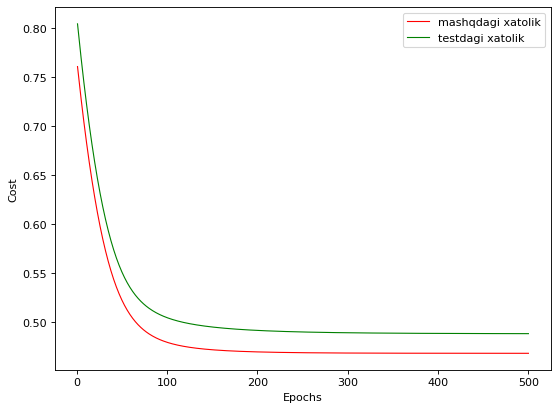

In [166]:
figure(figsize=(8, 6), dpi=80)

plot_cost(train_costs, test_costs, n_epochs)

Yuqoridagi grafdan ko'rib turibmizki, xatolik mashq to'plamida ham, test to'plamida ham har qadamda tushib boryapti. Bundan xulosa qilishimiz mumkinki, biz yaratgan logistik regressiya to'g'ri ishlayapti.

# Qaror qabul qilish chegarasi (Decision boundary)

Biz yaratgan logistik regressiyaning natijasi $[0,1]$ oraliqda yotadi, ya'ni butun bo'lmagan sonlarni chiqaradi. Bizning nishonlarimiz esa, qiymatlari 0 yoki 1 bo'lgan butun sonlardan iborat. Xususan, test to'plami uchun logistik regressiyani hisoblaylik va dastlabki 10ta elementi chop etaylik:

In [167]:
test_predictions = logistic_regression_function(X_test, A)
test_predictions[:10,:]

array([[0.74926893],
       [0.08762216],
       [0.16827159],
       [0.01457882],
       [0.50125461],
       [0.2747579 ],
       [0.20935115],
       [0.16839148],
       [0.96523638],
       [0.20502793]])

Yuqoridagi sonlarni 0 va 1 butun sonlarga aylantirish uchun, qaror qabul qilish chegarasini amalga oshiruvchi funksiyani yarataylik. Bunda chegara sifatida $0.5$ni tanlaymiz, ya'ni $0.5$ dan katta sonlarni $1$ va $0.5$ga teng va undan kichiklarini $0$ sifatida qabul qilamiz. Biz yaratgan funksiya massivlar bilan ishlay olishi uchun, ushbu funksiyani *numpy* bibliotekasining *vectorize* funksiyasi yordamida ishlov beramiz.

In [168]:
def db_function(prediction):
    if prediction > 0.5:
        return 1
    else:
        return 0
db_function = np.vectorize(db_function)

Biz yaratgan *db_function* funksiyasini amalga oshiraylik va *test_predictions* massividagi sonlarni butun sonlarga o'girib olaylik:

In [169]:
test_predictions = db_function(test_predictions)
test_predictions[:10,:]

array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0]])

# Model aniqliligi (Model accuracy)

Biz yaratgan modelning aniqliligini baholash uchun, Accuracy va F1Score o'lchovlarni hisoblaylik. Ushbu o'lchovlarni hisoblashdan oldin, bir nechta yordamchi o'lchovlarni aniqlab olaylik, xususan:
- Haqiqiy pozitiv - TP (True Positives)
- Haqiqiy negativ - TN (True Negatives)
- Yolg'on pozitiv - FP (False Positives)
- Yolg'on negativ - FN (False Negatives)
- To'plamdagi elementlar soni - N

Yuqoridagi yordamchi o'lchovlarni hisoblovchi funksiyani yaratamiz:

In [199]:
def calculate_helper_vars(predicted, actual):
    n = actual.shape[0]
    predicted = predicted.reshape(-1, actual.shape[1])
    tp = np.count_nonzero((predicted == actual) & (predicted == 1))
    tn = np.count_nonzero((predicted == actual) & (predicted == 0))
    fp = np.count_nonzero((predicted != actual) & (predicted == 1))
    fn = np.count_nonzero((predicted != actual) & (predicted == 0))
    return tp, tn, fp, fn, n

*calculate_helper_vars* funksiyasi yordamida yordamchi o'lchovlarni hisoblaylik:

In [200]:
tp, tn, fp, fn, n = calculate_helper_vars(test_predictions, Y_test)

In [201]:
print(tp, tn, fp, fn, n)

30 89 10 25 154


In [202]:
(tp + tn) / n

0.7727272727272727

Yordamchi o'lchovlar yordamida modelni baholovchi quyidagi o'lchovchlarni hisoblaylik:
- *Accuracy* - model aniqliligi haqidagi eng sodda usul
- *Precision* - to'g'ri prognoz qilingan pozitiv qiymatlarning pozitiv deya prognoz qilingan qiymatlarning umumiy soniga nisbatiga aytiladi
- *Recall (Sensisitivity)* - to'g'ri prognoz qilingan pozitiv qiymatlarning ma'lumotlar to'plamidagi barcha haqiqiy pozitiv nishonlarga nisbatidir
- *F1 Score* - *Precision* hamda *Recall* orqali ifodalaniladigan o'lchov bo'lib, model aniqligi haqida yanada aniqroq tasavvur beradi

Hisoblash uchun *calc_metrics* nomli funksiya yaratamiz:

In [203]:
def calc_metrics(tp, tn, fp, fn, n):
    accuracy = (tp + tn) / n
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (recall * precision) / (recall + precision)
    return accuracy, precision, recall, f1_score

*calc_metrics* funksiyasini ishga tushiramiz:

In [204]:
accuracy, precision, recall, f1_score = calc_metrics(tp, tn, fp, fn, n)
print('accuracy: %f, precision: %f, recall: %f, f1_score: %f'%(accuracy, precision, recall, f1_score))

accuracy: 0.772727, precision: 0.750000, recall: 0.545455, f1_score: 0.631579


O'lchovlar orqali model haqida quyidagi fikrlarni yuritishimiz mumkin: 
- bizning model test to'plamidagi 154 ta elementning 77% nishonini to'g'ri topgan (accuracy)
- model *1* deya bashorat qilgan nishonlarning 75% to'g'ri topilgan (precision)
- test to'plamdagi 1 nishonlarning 54% model tomonidan to'g'ri topilgan
- *F1 score* 0.63 ni tashkil etmoqda, ushbu o'lchovni qiyosiy o'lchov deb ham atasak bo'ladi. Chunki, odatda ushbu o'lchovlar orqali turli modellarning aniqliligi bir-biriga solishtiriladi.

O'lchovlar natijalaridan xulosa qilib aytishimiz mumkinki, modelning aniqliligi yaxshi, albatta yanada yaxshilash mumkin.

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logisticRegr = LogisticRegression()

In [65]:
logisticRegr.fit(X_train, Y_train)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [66]:
logisticRegr.predict(X_test[0].reshape(1,-1))

array([1.])

In [67]:
score = logisticRegr.score(X_test, Y_test)
print(score)

0.7727272727272727


In [68]:
skl_y = logisticRegr.predict(X_test)

In [69]:
our_y = logistic_regression_function(X_test, A)

In [70]:
from sklearn.metrics import f1_score

In [71]:
f1_score(Y_test, skl_y, average='macro')

0.7336298492710649

In [72]:
def softmax_(x):
    if x > 0.5:
        return 1
    else:
        return 0

In [73]:
n_our_y = np.array([softmax_(xi) for xi in our_y])

In [74]:
f1_score(Y_test, n_our_y, average='macro')

0.724398488765162

In [75]:
y_size = n_our_y.shape[0]

In [76]:
y_size

154

In [78]:
for i in range(y_size):
    print('our: %d, sk: %d, actual: %d'%(n_our_y[i], skl_y[i], Y_test[i]))

our: 1, sk: 1, actual: 1
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 0
our: 0, sk: 1, actual: 1
our: 0, sk: 0, actual: 1
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 0
our: 1, sk: 1, actual: 0
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 1
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 1
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 1
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 1
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 0
our: 1, sk: 1, actual: 0
our: 0, sk: 0, actual: 1
our: 1, sk: 1, actual: 1
our: 0, sk: 0, actual: 1
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 0
our: 0, sk: 0, actual: 0


In [91]:
n_t, _ = Y_test.shape
n_t

154

In [98]:
Y_test

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],

In [99]:
n_our_y.shape

(154,)

In [100]:
n_our_y = n_our_y.reshape(-1,1)

In [101]:
n_our_y

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
    

In [102]:
skl_y = skl_y.reshape(-1, 1)

In [103]:
skl_y

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],

In [104]:
o_c = np.count_nonzero(n_our_y == Y_test)
s_c = np.count_nonzero(skl_y == Y_test)

o_c_p = 100 * o_c / n_t
s_c_p = 100 * s_c / n_t

print('o_c: %d, oc_p: %d, sc: %d, sc_p: %d'%(o_c, o_c_p, s_c, s_c_p))

o_c: 118, oc_p: 76, sc: 119, sc_p: 77


In [72]:
y_train_our = sigmoid(z_function(X_train, A))

In [73]:
y_train_sk = logisticRegr.predict(X_train)

In [74]:
f1_score(Y_train, y_train_sk, average='macro')

0.7423479462875197

In [76]:
y_train_our = np.array([softmax_(xi) for xi in y_train_our])

In [77]:
f1_score(Y_train, y_train_our, average='macro')

0.7392957798481286

In [79]:
logisticRegr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [89]:
np.set_printoptions(suppress=True)

logisticRegr.coef_

array([[ 0.00001111,  1.01800167, -0.19108521, -0.03866117, -0.1095574 ,
         0.78527211,  0.32401458,  0.31336677]])

In [81]:
A

array([[-0.864489  ],
       [ 1.02318199],
       [-0.19323141],
       [-0.04243053],
       [-0.10775674],
       [ 0.79257005],
       [ 0.32593468],
       [ 0.3160319 ]])